# Advection Equation

Here we solve the advection equation $u_t + a u_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=\exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio

In [6]:
#Define the speed a
a = 1.0

#Define the domain
L = 10.0                    #Domain length
nx = 101                    #Number of grid points
dx = L / (nx - 1)           #Grid spacing
x = np.linspace(0, L, nx)   #Grid 

#Define the time step and the final time
cf = 0.5                    #Courant Factor
dt = (cf * dx) / a          #Time step
t_final = 20.0

print('Domain Length = ', L)
print('Grid Points = ', nx)
print('Grid resolution dx = ', dx)
print('Time resolution dt = ', dt)
print('Time of evolution  = ', t_final)
print('Number of iterations = ', t_final/dt)

#Define the initial condition
x0 = 5
u_initial = np.exp(-(x - x0)**2)

#Initialize the solution array
u_current = u_initial.copy()

#We create 2 arrays where we will store the time and the l2norm
l2norm = []
time = []

Domain Length =  10.0
Grid Points =  101
Grid resolution dx =  0.1
Time resolution dt =  0.05
Time of evolution  =  20.0
Number of iterations =  400.0


In [7]:
methods = ['FTCS', 'Lax-Friedrichs', 'Leapfrog', 'Lax-Wendroff']

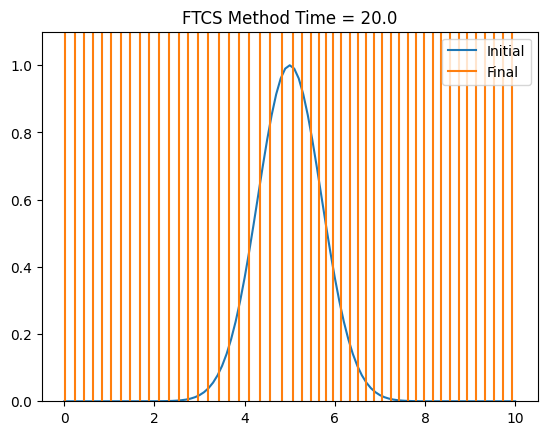

/var/folders/hz/p6990d5s151fqhq0n07rh8sm0000gn/T/ipykernel_10406/3047581427.py:102: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  current_image = imageio.imread('./Schemes/' + key + '/' + file)


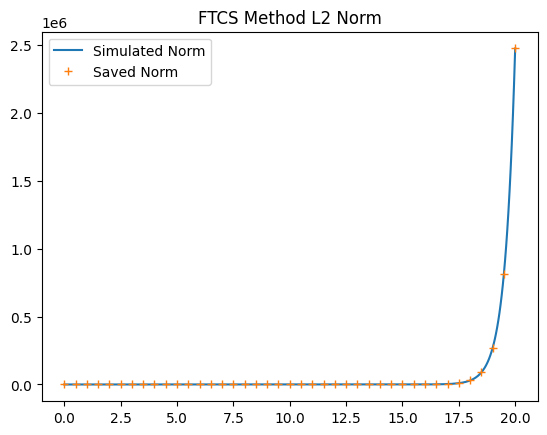

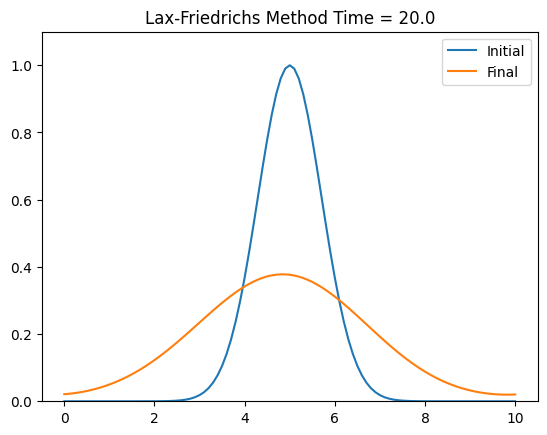

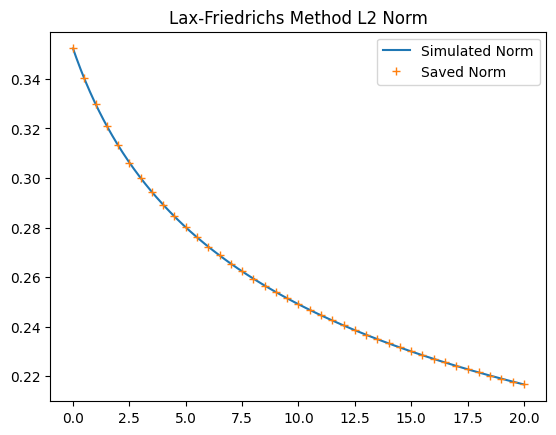

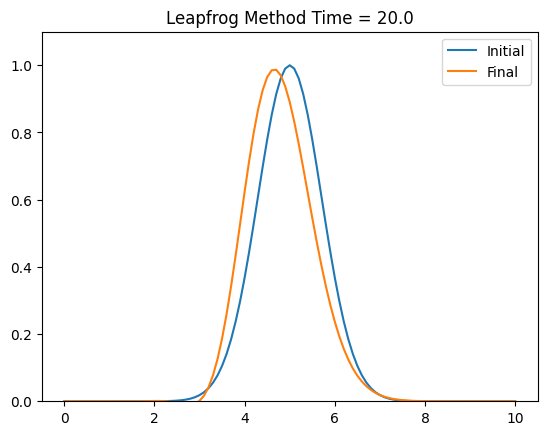

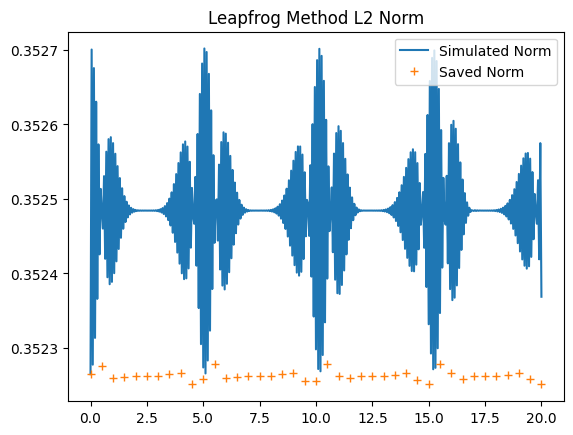

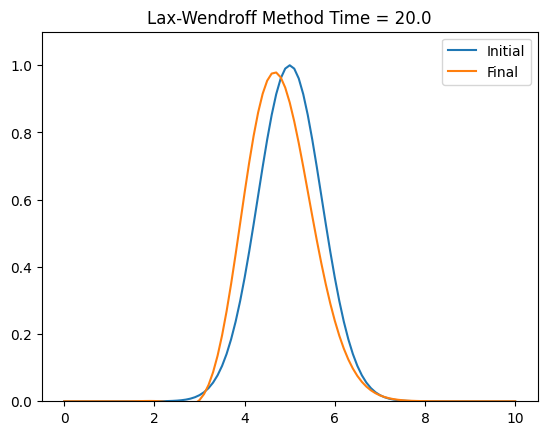

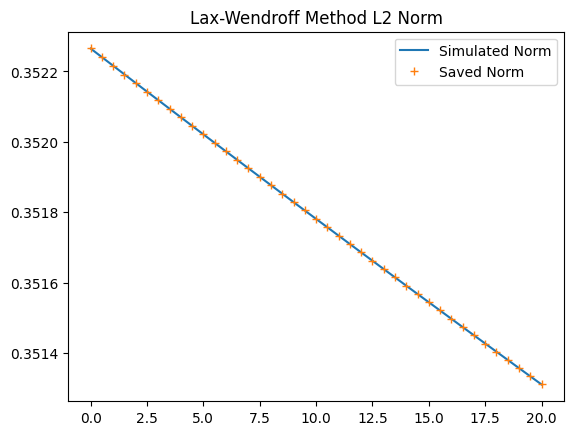

In [8]:
#Create directory where to save images

for key in methods:
    #Default path
    os.chdir('/Users/oliverbenjaminrossi/Visual Studio/Università/Numerical-Relativity/Advection/Schemes')

    #New folder
    dir = './' + key
    #os.makedirs(dir)

    #Enter new folder
    os.chdir(dir)

    #Reset Step
    l2norm.clear()
    time.clear()

    #Initial Conditions
    u_current = u_initial.copy()
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(0.0)

    #Initilize time and iteration counter
    t = 0.0
    i = 0
    c1 = (a * dt) / dx

    #Save the initial conditions
    plt.plot(x, u_current)
    plt.title(key + ' Method Time = ' + str(round(t, 2)))
    plt.ylim(0, 1.1)
    plt.savefig('fig_' + str(i).zfill(5)+'.png', dpi=200)
    plt.close()

    #Solve the advection equation
    while t < t_final:

            # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
            #       np.roll(u_current,  1) is equivalent to u(j-1)
            #       using np.roll is equivalent to use periodic boundary conditions

        if key == 'FTCS':
            #Compute solution with FTCS method
            u_next = u_current - 0.5 * c1 * (np.roll(u_current, -1) - np.roll(u_current, 1))

        elif key == 'Lax-Friedrichs':
            #Compute solution with Lax-Friedrichs method
            u_next = 0.5 * (np.roll(u_current, 1) + np.roll(u_current, -1)) - 0.5 * c1 * (np.roll(u_current, -1) - np.roll(u_current, 1))

        elif key == 'Leapfrog':
            #Compute solution with Leapfrog method
            if t == 0.0: #First step -> Compute first evolution with Lax-Friedrichs (or FTCS, but I chose Lax-Friedrichs)
                u_next = u_current - 0.5 * c1 * (np.roll(u_current, -1) - np.roll(u_current, 1))
                u_previous = u_current.copy()

            else: #Second step -> We can move forwards with Leapfrog!
                u_next = u_previous - c1 * (np.roll(u_current, -1) - np.roll(u_current, 1))
                u_previous = u_current.copy()

        elif key == 'Lax-Wendroff':
            #Compute solution with Lax-Wendroff method
            u_next = u_current - 0.5 * c1 * (np.roll(u_current, -1) - np.roll(u_current, 1)) + 0.5 * (c1 ** 2) * (np.roll(u_current, -1) -2 * u_current + np.roll(u_current, 1))

        # Update the solution
        u_current = u_next.copy()
        
        #advance the time 
        t += dt
        i += 1
        
        #compute the l2 norm and add the time to the time vector
        l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
        time.append(t)
        
        #plot the current result and save in an image every 5 iterations
        if (i%5 == 0):
            plt.plot(x, u_current)
            plt.title('Time='+str(round(t,2)))
            plt.ylim(0, 1.1)
            plt.savefig('fig_' + str(i).zfill(5)+'.png', dpi=200)
            plt.close()

    #Plot the final solution
    plt.plot(x, u_initial, label='Initial')
    plt.plot(x, u_current, label='Final')
    plt.title(key + ' Method Time = ' + str(round(t, 2)))
    plt.ylim(0, 1.1)
    plt.legend()
    plt.show()

    #Movie Creation
    #Get the list of image files in the current directory
    files = os.listdir('./')

    #Sort the files in alphanumeric order
    files = sorted(files)

    os.chdir('/Users/oliverbenjaminrossi/Visual Studio/Università/Numerical-Relativity/Advection')

    with imageio.get_writer('./Movies/' + key + '.mp4', mode='I', quality=10) as writer:
        for file in files:
            current_image = imageio.imread('./Schemes/' + key + '/' + file)
            writer.append_data(current_image)

    files = []

    #L2 Norm Comparison with data stored
    l2_saved = np.genfromtxt('l2norm_' + key + '.dat', comments='#')

    plt.plot(time, l2norm, label='Simulated Norm', c='C0')
    plt.plot(l2_saved[:, 0], l2_saved[:, 1], '+', label='Saved Norm', c='C1')
    plt.title(key + ' Method L2 Norm')
    plt.legend()
    plt.savefig('./L2_Norm/L2_Norm_' + key + '.png', dpi=200)
    plt.show()